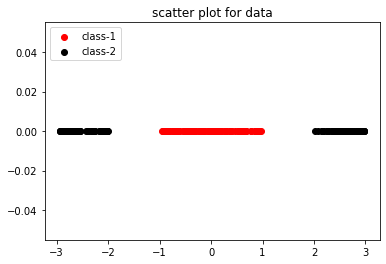

In [129]:
import numpy as np
from random import randint, choice
import matplotlib.pyplot as plt
import math
x_c1=np.random.uniform(-1,1,(100,1))
for i in range(100):
  x_c1[i]=np.random.uniform(-1,1)
x_c2=np.zeros(shape=(100,1))
for i in range(100):
    x_c2[i]=choice([np.random.uniform(-3,-2) , np.random.uniform(2,3)])
y=np.zeros(100)
a=plt.scatter(x_c1,y,c='red')
a.set_label('class-1')
b=plt.scatter(x_c2,y,c='black')
b.set_label('class-2')
plt.legend(loc='upper left')
plt.title('scatter plot for data')
plt.show()

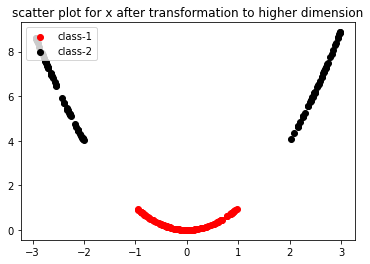

In [130]:
x2_c1=np.zeros(shape=(100,1))
for i in range(100):
  x2_c1[i]=np.power(x_c1[i],2)
x2_c2=np.zeros(shape=(100,1))
for i in range(100):
  x2_c2[i]=np.power(x_c2[i],2)
a=plt.scatter(x_c1,x2_c1,c='red')
b=plt.scatter(x_c2,x2_c2,c='black')
a.set_label('class-1')
b.set_label('class-2')
plt.legend(loc='upper left')
plt.title('scatter plot for x after transformation to higher dimension')
plt.show()

In [131]:
m1=np.zeros(shape=(2,1))
m1[0]=np.mean(np.array(x_c1))
m1[1]=np.mean(np.array(x2_c1))
m2=np.zeros(shape=(2,1))
m2[0]=np.mean(np.array(x_c2))
m2[1]=np.mean(np.array(x2_c2))
print(m1.shape,m2.shape)
print(m1)
print(m2)

(2, 1) (2, 1)
[[-0.03372655]
 [ 0.32297222]]
[[-0.11886133]
 [ 6.42623001]]


In [0]:
phi_x1=np.zeros(shape=(100,2))
phi_x2=np.zeros(shape=(100,2))
for i in range(100):
  phi_x1[i][0]=x_c1[i]
  phi_x1[i][1]=x2_c1[i]
  phi_x2[i][0]=x_c2[i]
  phi_x2[i][1]=x2_c2[i]

In [133]:
for i in range(100):
  phi_x1[i].reshape(2,1)
  phi_x2[i].reshape(2,1)
a=np.zeros(shape=(2,2))
b=np.zeros(shape=(2,2))
for i in range(len(phi_x1)):
  a+=np.matmul((phi_x1[i]-m1),(phi_x1[i]-m1).T)
  b+=np.matmul((phi_x2[i]-m2),(phi_x2[i]-m2).T)
print(a)
print(b)
s_w=a+b
print(s_w)
w=np.matmul(np.linalg.inv(s_w),(m1-m2))
print(w)

[[53.7474244  41.02402319]
 [41.02402319 53.7474244 ]]
[[5127.07257163  843.25050967]
 [ 843.25050967 5127.07257163]]
[[5180.81999603  884.27453285]
 [ 884.27453285 5180.81999603]]
[[ 0.00022403]
 [-0.00121629]]


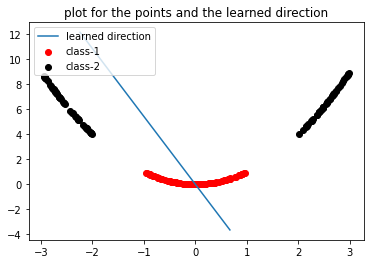

In [134]:
p1=[-10000*w[0],-10000*w[1]]
p2=[3000*w[0],3000*w[1]]
x_values = [p1[0], p2[0]]
y_values = [p1[1], p2[1]]
plt.plot(x_values, y_values,label='learned direction')
a1=plt.scatter(x_c1,x2_c1,c='red')
b1=plt.scatter(x_c2,x2_c2,c='black')
a1.set_label('class-1')
b1.set_label('class-2')
plt.legend(loc='upper left')
plt.title('plot for the points and the learned direction')
plt.show()

In [0]:
x5d1=x_c1
x5d2=x_c2
y5d=y

In [0]:
def kernel_fun(x,y,gamma):
  k = np.exp(-gamma * np.linalg.norm(x - y) ** 2)
  return k

plot for gamma = 0.5
theta chosen is: -45.92249793013709
classification accuracy is: 1.0


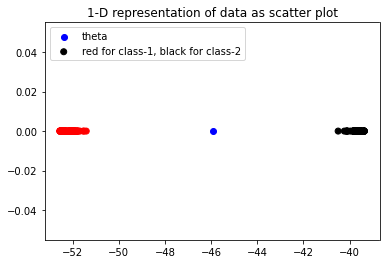

In [143]:
xtemp1=x_c1
xtemp2=x_c2

#print(xtemp2)
gamma=0.5
K1=np.zeros((200,100))
for i in range(100):
  for j in range(100):
    K1[i,j]=kernel_fun(xtemp1[i],xtemp1[j],gamma)
for i in range(100,200):
  for j in range(100):
    K1[i,j]=kernel_fun(xtemp2[i-100],xtemp1[j],gamma)
#print(K2)
K2=np.zeros((200,100))
for i in range(100):
  for j in range(100):
    K2[i,j]=kernel_fun(xtemp1[i],xtemp2[j],gamma)
xtemp2=x5d2
for i in range(100,200):
  for j in range(100):
    K2[i,j]=kernel_fun(xtemp2[i-100],xtemp2[j],gamma)
#plt.scatter(K1,K2)

ell1=np.zeros((100,100))
for i in range(100):
  for j in range(100):
    ell1[i,j]=0.01
ell2=np.zeros((100,100))
for i in range(100):
  for j in range(100):
    ell2[i,j]=0.01
#print(ell2)
I1=np.identity(100)
I2=np.identity(100)
#print(I1)
mid1=I1-ell1
mid2=I2-ell2
left1=np.matmul(mid1,K1.T)
left2=np.matmul(mid2,K2.T)
N1=np.matmul(K1,left1)
N2=np.matmul(K2,left2)
N=N1+N2
#print('determinant of N is:',np.linalg.det(N))
I=np.identity(200)
N=N+0.001*I

M1=np.zeros((200,1))
for i in range(100):
  sum1=0
  for k in range(100):
    sum1+=kernel_fun(xtemp1[i],xtemp1[k],gamma)
  M1[i]=sum1/100
for j in range(100,200):
  sum2=0
  for k in range(100):
    sum2+=kernel_fun(xtemp2[j-100],xtemp1[k],gamma)
  M1[j]=sum2/100
#print(M1)
M2=np.zeros((200,1))
for i in range(100):
  sum3=0
  for k in range(100):
    sum3+=kernel_fun(xtemp1[i],xtemp2[k],gamma)
  M2[i]=sum3/100
for j in range(100,200):
  sum4=0
  for k in range(100):
    sum4+=kernel_fun(xtemp2[j-100],xtemp2[k],gamma)
  M2[j]=sum4/100
M=M2-M1
temp=np.linalg.inv(N)
alpha=np.matmul(temp,M)
#print(alpha.shape)
one_d_rep=np.zeros((200,1))
for i in range(100):
  sum1=0
  for k1 in range(100):
    sum1+=alpha[k1]*kernel_fun(xtemp1[k1],xtemp1[i],gamma)
  for k2 in range(100,200):
    sum1+=alpha[k2]*kernel_fun(xtemp2[k2-100],xtemp1[i],gamma)
  one_d_rep[i]=sum1
for i in range(100,200):
  sum=0
  for k1 in range(100):
    sum+=alpha[k1]*kernel_fun(xtemp1[k1],xtemp2[i-100],gamma)
  for k2 in range(100,200):
    sum+=alpha[k2]*kernel_fun(xtemp2[k2-100],xtemp2[i-100],gamma)
  one_d_rep[i]=sum
x_val=np.vstack((xtemp1,xtemp2))
#print(x_val.shape)
print('plot for gamma =', gamma)
z=np.zeros((200,1))
f=np.zeros((200,1))
for i in range(1,100):
  f[i]=1
for i in range(100,200):
  f[i]=2
meany=np.mean(one_d_rep)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(-50,50)
p=0


y_pred=np.zeros((200,1))
for i in range(200):
  if one_d_rep[i]<meany:
    y_pred[i]=1
  else:
    y_pred[i]=2
acc=0
for i in range(100):
  if one_d_rep[i]<meany:
    acc=acc+1
for i in range(100,200):
  if one_d_rep[i]>meany:
    acc=acc+1
print('theta chosen is:', meany)
print('classification accuracy is:',acc/200)
#plt.scatter(meany,z,c='pink')
#
a=plt.scatter(meany,p,c='blue')
a.set_label('theta')
b1=plt.scatter(one_d_rep,z,c=['red' if f_i ==1 else 'black' for f_i in f])
b1.set_label('red for class-1, black for class-2')
plt.title('1-D representation of data as scatter plot')
plt.legend(loc='upper left')

Text(0, 0.5, 'alpha')

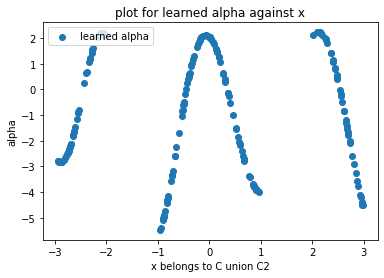

In [144]:
by=plt.scatter(x_val,alpha)
by.set_label('learned alpha')
plt.title('plot for learned alpha against x')
plt.legend(loc='upper left')
plt.xlabel("x belongs to C union C2")
plt.ylabel("alpha")